<a href="https://colab.research.google.com/github/WendelNCruz/frexco_previsao_de_demanda/blob/main/previsao_demanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Previsão de Demanda

Atualmente existem diversos modelos/técnicas utilizadas  para realizar a previsão de Séries Temporais, um dos mais conhecidos é o ARIMA (Autoregressive Integrated Moving Average). Tal modelo pode ser aplicado na previsão de demanda de uma cadeia de suprimentos, analisando diversas séries temporais com comportamentos distintos. Por possuir essas características se torna ideal para trabalhar com desafios em que os dados possuem alta volatilidade nas Séries Temporais, como ocorre nas vendas de determinados produtos.

Para trabalhar com ARIMA é preciso elencar seus três parâmetros, números inteiros representados pelas letras p, d e q. Cada uma dessas letras representam uma parte da sigla ARIMA:


*   O parâmetro p está associado a parte auto-regressiva do modelo (AR), permitindo a incorporação do efeito de valores passados em nosso modelo;
*   Já o parâmetro d é correlacionado a parte integrativa do modelo(I), sendo o número de diferenças não sazonais necessárias para estacionaridade;
*   Por fim, o parâmetro q está ligado a parte da média móvel do modelo(MA), permitindo a visualização do número de erros de previsão defasados na equação.

Uma série temporal é um modelo ARMA(p,q) se satisfizer:

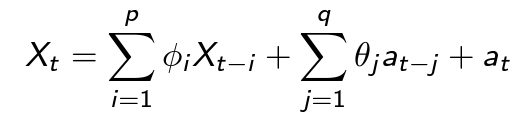

onde ϕ1, ···, ϕp são os parâmetros da parte AR, θ1, ···, θq são os parâmetros da parte MA e at é um ruído branco.

In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Importando Blibiotecas

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from pmdarima.arima import auto_arima

#Upload na Base de Dados

dateparse = lambda x: pd.to_datetime(x, format='%m/%d/%Y')
data = pd.read_excel('Dados.xlsx', parse_dates=['Data'], index_col='Data', date_parser=dateparse)


data.head(10)

,Vendas
Data,
2022-12-06,870
2022-12-07,868
2022-12-08,1189
2022-12-09,742
2022-12-10,317
2022-12-11,685
2022-12-12,1366
2022-12-13,1213
2022-12-14,1055


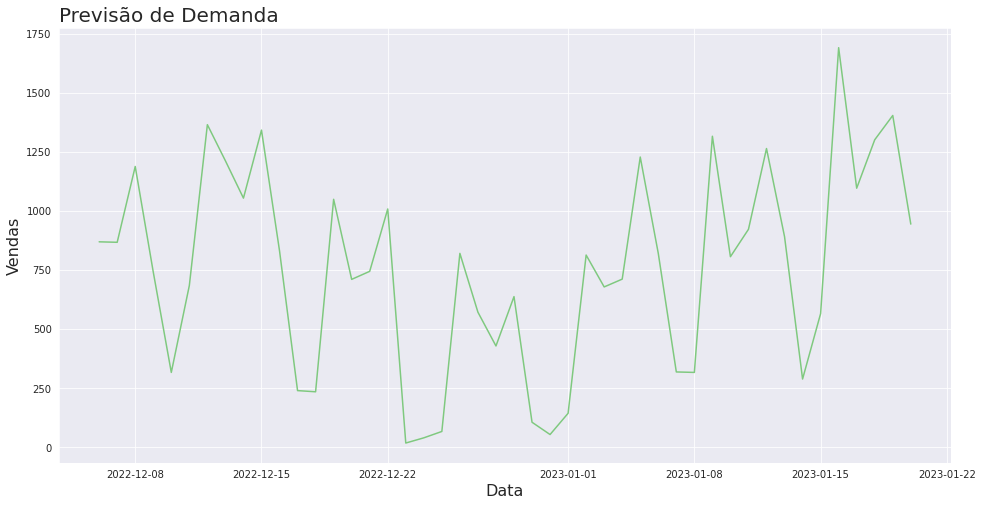

In [4]:
# Com bases nos estilos padrões do https://urbaninstitute.github.io/graphics-styleguide/
def plotar (titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    grafico = sns.lineplot(x=x, y=y, data=dataset)
    grafico.figure.set_size_inches(16,8)
    grafico.set_title(titulo, loc='left', fontsize=20)
    grafico.set_xlabel(labelx, fontsize=16)
    grafico.set_ylabel(labely, fontsize=16)
    grafico = grafico
  
plotar('Previsão de Demanda', 'Data', 'Vendas', 'Data', 'Vendas', data)

Aplicação do AutoARIMA. Escolha de Parâmetros(p, d, q, P, D e Q):


*   p = variação entre 1 e 6;
*   q = variação entre 1 e 6;
*   d = 1, MAX será 2(padrão);
*   sazonalidade mensal (m=12);
*   P iniando em 0, MAX será 2(padrão);
*   Q iniando em 1, MAX será 2(padrão);
*   D = 1, por padrão já é 1.

Deve-se atribuir a uma variável o autoARIMA, onde será gerado vários modelos cos seus respectivos AIC's e BICS.

In [5]:
stepwise=auto_arima(data,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.50 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=532.826, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=525.788, Time=0.46 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=533.620, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=524.284, Time=0.76 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=523.481, Time=0.35 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=524.881, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=525.086, Time=1.12 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=517.982, Time=0.47 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=521.211, Time=0.17 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=

In [6]:
stepwise

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True)

In [7]:
stepwise.aic()

516.55169078619

In [8]:
stepwise1=auto_arima(data,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=532.826, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=1.10 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=524.881, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=523.481, Time=0.31 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=525.086, Time=1.11 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.21 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=526.410, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=521.211, Time=0.36 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=517

In [9]:
stepwise1

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(2, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [10]:
stepwise1.aic()

515.5426021300159

Separação dos dados de treino e de teste:

Utilização do autoARIMA para gerar uma validação do modelo. Os dados de treino serão usado para treinar o autoARIMA e os dados de teste para comparar com as preisões geradas.

In [11]:
train=data.loc['2022/12/06':'2023/01/21']
test=data.loc['2023/01/01':]

In [12]:
#Treinar os modelos gerados
stepwise.fit(train)
stepwise1.fit(train)

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(2, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [13]:
#Gerar as previsões de cada modelo
future_forecast=stepwise.predict(n_periods=5)
future_forecast1=stepwise1.predict(n_periods=5)

In [15]:
#Transformando as previsões em um dataframe
future_forecast=pd.DataFrame(future_forecast,index=test.index, columns=['Previsão 1'])
future_forecast1=pd.DataFrame(future_forecast1,index=test.index, columns=['Previsão 2'])

In [17]:
stepwise.fit(data)

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True)

In [19]:
future_forecast2=stepwise.predict(n_periods=5)

In [20]:
#Previsão para os próximos 5 dias

future_forecast2=pd.DataFrame(future_forecast2, 
                              index=pd.date_range(start='21/01/2023',
                                                  end='25/01/2023', freq='MS'),columns=['Previsão Próximos 5 dias'])